
1. Your task is to find a linear approximation of the function √
1 + x, x ∈
[0, 1]. Your homework should contain the following steps:

a) Generate N = 10000 random numbers from [0, 1]:
x1, x2, . . . , xN ∈ [0, 1] ,
and then obtain their labels: yi =
√
1 + xi
, i = 1, 2, . . . , N.

b) Do linear regression on your generated data using the closed form
solution.

c) Do linear regression on your generated data using the library sklearn.

d) Do linear regression on your generated data implementing the gradient descent algorithm by yourself.

e*) Do linear regression on your generated data using tensorflow.

f) Sketch the graphs of all approximations on one graph.

g) Compare all solutions with the first degree Taylor approximation of
the function √(
1 + x).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import scipy.special

In [ ]:
x_train=np.random.rand(10000)
y_train=np.sqrt(1+x_train)
x_train=x_train.reshape((10000,1))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(10000, 1)
(10000,)


In [37]:
class LinReg:
    
    # Initializing learning rate, epochs, weights and bias
    def __init__(self, rate=0.2, epochs=800):
        self.rate = rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    # Training function: fit
    def fit(self, X, y):
    
        m, n = X.shape    
    
        # self.weights = np.random.rand(n).reshape((n,1))
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        y = y.reshape(m,1)
        losses=[]

        # Gradient Descent loop/ Training loop
        for epoch in range(self.epochs):
        
            # Calculating prediction: y_hat or h(x)
            y_hat = np.dot(X, self.weights) + self.bias
     
            # Calculting loss
            loss = np.mean((y_hat - y)**2)
            losses.append(loss)

            # Weight derivative
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            # Bias derivative
            db = (1/m)*np.sum((y_hat - y))

            self.weights -= self.rate*dw
            self.bias -= self.rate*db
        
        return self.weights, self.bias, losses

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

[[0.41141875]] 1.0132920215676156


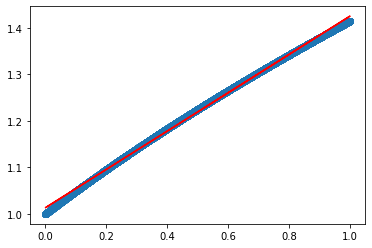

In [38]:
model=LinReg()
W,B,los=model.fit(x_train,y_train)

plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')
print(model.weights,model.bias)
pat1=model.predict(x_train)

(array([0.41141575]), 1.0132936352000632)

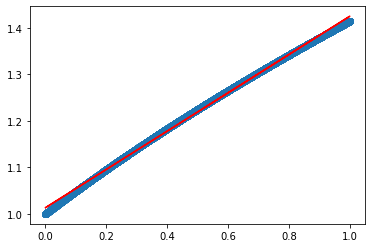

In [39]:
mod=LinearRegression()
mod.fit(x_train,y_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,mod.predict(x_train),color='red')
pat2=mod.predict(x_train)
mod.coef_,mod.intercept_

In [ ]:
def taylor(x,n):
  '''
  function to find sqrt(x)
  with taylor sequence 
  x: the number
  n: chshtutyun
  '''
  sum=0
  for i in range(n+1):
    sum+=((i+1)**(0.5-i))*((x-i)**i)*scipy.special.binom(0.5, i)
  return sum

In [ ]:
pat3=taylor(x_train+1,10)

print(np.mean(pat2-pat1))
print(np.mean(pat1-pat3))
print(np.mean(pat2-pat3))

1.0484454536981767e-07
0.08402481205021872
0.08402491689476431


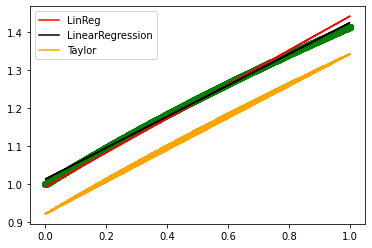

In [ ]:
plt.scatter(x_train,y_train,color='green',alpha=0.5)
plt.plot(x_train,model.predict(x_train),color='red',label='LinReg')
plt.plot(x_train,mod.predict(x_train),color='black',label='LinearRegression')
plt.plot(x_train,taylor(x_train+1,8),'orange',label='Taylor');
plt.legend();

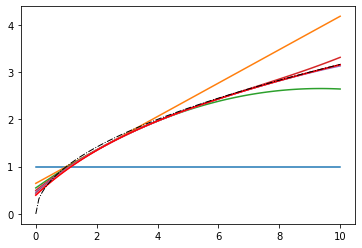

In [ ]:
x=np.linspace(0,10,100)

plt.plot(x,taylor(x,1))
plt.plot(x,taylor(x,2))
plt.plot(x,taylor(x,3))
plt.plot(x,taylor(x,4))
plt.plot(x,taylor(x,5))
plt.plot(x,taylor(x,6))
plt.plot(x,taylor(x,7))
plt.plot(x,taylor(x,8),'r')
plt.plot(x,np.sqrt(x),'-.',color='black',linewidth=1);